# Project 4: Natural Language Processing - First Year Project 2021 
## Working with natural language data  
---
### Group 8: Ida Maria Zachariassen, Magnus Sverdrup, Rasmus Bondo Hansen, Ruben Oliver Jonsman and Sabrina Fonseca Pereira

This notebook contains all the code developed in the Project 4 - Natural Language Processing

Contact/Group: 
- Ida Maria Zachariassen(idza@itu.dk)
- Magnus Sverdrup(magsv@itu.dk)
- Rasmus Bondo Hansen(rabh@itu.dk)
- Ruben Jonsman(rubj@itu.dk)
- Sabrina Fonseca Pereira(sabf@itu.dk)

### Introduction

# Required Libraries
---

In [1]:
import re
import numpy as np
import pandas as pd
import collections as cl
import nltk
from nltk.lm.preprocessing import pad_both_ends
from nltk.metrics.agreement import AnnotationTask
from nltk.tokenize import TweetTokenizer
import difflib as dl
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from nltk.util import everygrams
from nltk.lm.preprocessing import flatten
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE
from sklearn.metrics import confusion_matrix



import nltk.tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, recall_score, precision_score, f1_score, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

#import warnings
#warnings.filterwarnings('ignore')


## Consistent variables
### Paths to the data

In [2]:
PATHS = {}

#Path to the irony datasets
PATHS["irony"] = "../datasets/irony/{}.txt"

#Path to the stance datasets
PATHS["stance"] = "../datasets/stance/{}.txt"

#Path to our manual annotation answers
PATHS["MMA"] = "../datasets/annotations/annotations_{}.csv"

## Dataframes

### Irony

In [3]:
labels_irony = pd.read_csv(PATHS["irony"].format("mapping"), delimiter = "\t", header = None)

In [4]:
train_irony = pd.read_csv(PATHS["irony"].format("train_text"), delimiter = "\n", header = None, names = ["tweets"])
train_irony_labels = pd.read_csv(PATHS["irony"].format("train_labels"), delimiter = "\n", header = None, names=["labels"])
test_irony = pd.read_csv(PATHS["irony"].format("test_text"), delimiter = "\n", header = None, names = ["tweets"])
test_irony_labels = pd.read_csv(PATHS["irony"].format("test_labels"), delimiter = "\n", header = None, names=["labels"])
validation_irony = pd.read_csv(PATHS["irony"].format("val_text"), delimiter = "\n", header = None, names = ["tweets"])
val_irony_labels = pd.read_csv(PATHS["irony"].format("val_labels"), delimiter = "\n", header = None, names=["labels"])

### Stance

In [5]:
labels_stance = pd.read_csv(PATHS["stance"].format("mapping"), delimiter = "\t", header = None)

##### Abortion

In [6]:
train_abortion = pd.read_csv(PATHS["stance"].format("/abortion/train_text"), delimiter = "\n", header = None, names = ["tweets"])
train_abortion_labels = pd.read_csv(PATHS["stance"].format("/abortion/train_labels"), delimiter = "\n", header = None, names=["labels"])
test_abortion = pd.read_csv(PATHS["stance"].format("/abortion/test_text"), delimiter = "\n", header = None, names = ["tweets"])
test_abortion_labels = pd.read_csv(PATHS["stance"].format("/abortion/test_labels"), delimiter = "\n", header = None,names=["labels"])
validation_abortion = pd.read_csv(PATHS["stance"].format("/abortion/val_text"), delimiter = "\n", header = None, names = ["tweets"])
validation_abortion_labels = pd.read_csv(PATHS["stance"].format("/abortion/val_labels"), delimiter = "\n", header = None, names=["labels"])

##### Atheism

In [7]:
train_atheism = pd.read_csv(PATHS["stance"].format("/atheism/train_text"), delimiter = "\n", header = None, names = ["tweets"])
train_atheism_labels = pd.read_csv(PATHS["stance"].format("/atheism/train_labels"), delimiter = "\n", header = None, names=["labels"])
test_atheism = pd.read_csv(PATHS["stance"].format("/atheism/test_text"), delimiter = "\n", header = None, names = ["tweets"])
test_atheism_labels = pd.read_csv(PATHS["stance"].format("/atheism/test_labels"), delimiter = "\n", header = None, names=["labels"])
validation_atheism = pd.read_csv(PATHS["stance"].format("/atheism/val_text"), delimiter = "\n", header = None, names = ["tweets"])
validation_atheism_labels = pd.read_csv(PATHS["stance"].format("/atheism/val_labels"), delimiter = "\n", header = None, names=["labels"])

##### Climate

In [8]:
train_climate = pd.read_csv(PATHS["stance"].format("/climate/train_text"), delimiter = "\n", header = None, names = ["tweets"])
train_climate_labels = pd.read_csv(PATHS["stance"].format("/climate/train_labels"), delimiter = "\n", header = None, names=["labels"])
test_climate = pd.read_csv(PATHS["stance"].format("/climate/test_text"), delimiter = "\n", header = None, names = ["tweets"])
test_climate_labels = pd.read_csv(PATHS["stance"].format("/climate/test_labels"), delimiter = "\n", header = None, names=["labels"])
validation_climate = pd.read_csv(PATHS["stance"].format("/climate/val_text"), delimiter = "\n", header = None, names = ["tweets"])
validation_climate_labels = pd.read_csv(PATHS["stance"].format("/climate/val_labels"), delimiter = "\n", header = None, names=["labels"])

##### Feminist

In [9]:
train_feminist = pd.read_csv(PATHS["stance"].format("/feminist/train_text"), delimiter = "\n", header = None, names = ["tweets"])
train_feminist_labels = pd.read_csv(PATHS["stance"].format("/feminist/train_labels"), delimiter = "\n", header = None, names=["labels"])
test_feminist = pd.read_csv(PATHS["stance"].format("/feminist/test_text"), delimiter = "\n", header = None, names = ["tweets"])
test_feminist_labels = pd.read_csv(PATHS["stance"].format("/feminist/test_labels"), delimiter = "\n", header = None, names=["labels"])
validation_feminist = pd.read_csv(PATHS["stance"].format("/feminist/val_text"), delimiter = "\n", header = None, names = ["tweets"])
validation_feminist_labels = pd.read_csv(PATHS["stance"].format("/feminist/val_labels"), delimiter = "\n", header = None, names=["labels"])

##### Hillary

In [10]:
train_hillary = pd.read_csv(PATHS["stance"].format("/hillary/train_text"), delimiter = "\n", header = None, names = ["tweets"])
train_hillary_labels = pd.read_csv(PATHS["stance"].format("/hillary/train_labels"), delimiter = "\n", header = None, names=["labels"])
test_hillary = pd.read_csv(PATHS["stance"].format("/hillary/test_text"), delimiter = "\n", header = None, names = ["tweets"])
test_hillary_labels = pd.read_csv(PATHS["stance"].format("/hillary/test_labels"), delimiter = "\n", header = None, names=["labels"])
validation_hillary = pd.read_csv(PATHS["stance"].format("/hillary/val_text"), delimiter = "\n", header = None, names = ["tweets"])
validation_hillary_labels = pd.read_csv(PATHS["stance"].format("/hillary/val_labels"), delimiter = "\n", header = None, names=["labels"])

### Manual annotation answers for the irony dataset

In [ ]:
MAA = pd.DataFrame()

MAA["sabrina"] = pd.read_csv(PATHS["MMA"].format("sabrina"), names = ["label"])["label"]
MAA["rasmus"] = pd.read_csv(PATHS["MMA"].format("rasmus"), names = ["label"])["label"]
MAA["ruben"] = pd.read_csv(PATHS["MMA"].format("ruben"), names = ["label"])["label"]
MAA["ida"] = pd.read_csv(PATHS["MMA"].format("ida"), names = ["label"])["label"]
MAA["magnus"] = pd.read_csv(PATHS["MMA"].format("magnus"), names = ["label"])["label"]
MAA["truth"] = pd.read_csv("../datasets/annotations/iaa_labels.txt", names = ["label"])["label"]

MAA

## 1. Preprocessing

discuss in your group what a good tokenisation of this subset should look like

## "ideal" tokenizer

In [11]:
# Made by Rasmus (not the good one I would say)
def tokenize_ideal(line):
    tokens = []
    unmatchables = []
    
    for word in line.split():
        if re.findall(r"\w+-\w+|\w+'\w+|\w+|[.&?%!#…]+", word) != []:
            x = re.findall(r"\w+-\w+|\w+'\w+|\w+|[.&?%!#…]+", word)
            for element in x:
                if element == "âž" or element == "ðŸ":
                    continue
                elif element == "&":
                    tokens.append("and")
                else:
                    tokens.append(element.lower())

        if re.findall(r"\w+-\w+|\w+'\w+|\w+|[.&?%!#…]", word) != [word] and re.findall(r"[^\w|.&!?%#…]+", word) != []:
            unmatchables.append(re.findall(r"[^\w|.!#?%…&]+", word)[0])


    return (tokens, unmatchables)

In [12]:
# Made by Rasmus
def tokenize_meaning(line):
    """
    Takes a string as an input, this is a line or a tweet from our database. Splits the relevant words or characters into
    separate tokens.
    Returns either the tokens as a whitespace delimited string or as a list of the tokens. Also returns the non tokens as a list
    """
    tokens = []
    unmatchables = []
    
    for word in line.split():
        if re.findall(r"\w+-\w+|\w+'\w+|\w+|[&?!…]+", word) != []:
            x = re.findall(r"\w+-\w+|\w+'\w+|\w+|[&?!…]+", word)
            for element in x:
                if element == "âž" or element == "ðŸ":
                    continue
                elif element == "&":
                    tokens.append("and")
                else:
                    tokens.append(element.lower())

        if re.findall(r"\w+-\w+|\w+'\w+|\w+|[&?!…]", word) != [word] and re.findall(r"[^\w|&!?…]+", word) != []:
            unmatchables.append(re.findall(r"[^\w|!?…&]+", word)[0])

    s = ""
    for token in tokens:
        s = s + " " + token
    return (s[1:], unmatchables, tokens)

In [ ]:
# Ida changed the tweets to be tokenized to only be a fraction of the training set, then adding the total tokenization of the whole irony data further down
irony_tester = train_irony[:1000]

tokens = []
tokens_list = []
unmatches = []
for tweet in list(irony_tester["tweets"]):
    tokenized = tokenize_meaning(tweet)
    tokens_list.append(tokenized[2])
    for token in tokenized[2]:
        tokens.append(token)
    for un in tokenized[1]:
        unmatches.append(un)
    #print(tweet)
    #print(x[0])

print(tokens_list)    

### Comparison with baseline tokenizer

To understand how general tokenizers work, and to figure out the quality of our own tokenizers, we wanted to compare our tokenizers with a baseline tokenisation tool. Here we use the social media tokeniser called TweetTokenizer from the nltk library: https://www.nltk.org/api/nltk.tokenize.html

In [ ]:
tknzr = TweetTokenizer()

In [ ]:
nltk_tokens = []
nltk_list = []
for tweet in list(train_irony["tweets"]):
    tokenized = tknzr.tokenize(tweet)
    nltk_list.append(tokenized)
    for token in tokenized:
        nltk_tokens.append(token)
print(nltk_list)

To clearly see the differences between our own tokenizer and the baseline tokenizer, we use the difflib library. As an example we only look at the five first tweets. <br>
"+" means that the word is present in the output from the baseline tokenizer but not in the output from our tokenizer <br>
"-" mean that the word is not present in the output from the baseline tokenizer but it is in our tokenizer

In [ ]:
for i in range(5):
    #print(tokens_list[i])
    #print(nltk_list[i])
    for diff in dl.unified_diff(tokens_list[i], nltk_list[i]):
        print(diff)

## 2. Characterising Your Data
Characterising the training sets of the <i>Irony Detection</i> and the <i>Stance Detection</i> in terms of elementary corpus statistics: <br>
<ul>
    <li>Corpus size, vocabulary size, type/token ration <br>
            Frequent tokens, rare tokens </li><br>
    <li>The corpus statistics correpondense with Zipf's law </li><br>
    <li>Differences between the datasets of the Binary Task and Multiclass Task </li><br>
</ul>

### Functions

In [ ]:
nltk_list[0]

In [ ]:
def vocabulary(tokens):
    vocabulary = pd.DataFrame()
    vocabulary_counter = cl.Counter(tokens)
    vocabulary["word"] = vocabulary_counter.keys()
    vocabulary["frequency"] = vocabulary_counter.values()
    vocabulary = vocabulary.sort_values(by = ["frequency"], ascending = False)
    
    return vocabulary

### Irony
##### Corpus, vocabulary and token-ratio

Corpus size

In [ ]:
!wc "../datasets/irony/train_text.txt"
print("Number of lines, words and characters in the training text file for the binary class Irony. \n")

!wc -l "../datasets/irony/train_labels.txt"
print("Number of lines in the training label file for the binary class Irony.")

First tokenizing all the tweets in the <i>Irony</i> class (using tokenizer function from earlier), then creating the corresponding vocabulary (see under functions) and the token count.

In [ ]:
irony_tokens = []
irony_tokens_list = []
irony_unmatches = []

for tweet in train_irony["tweets"]:
    tokenized = tokenize_meaning(tweet)
    irony_tokens_list.append(tokenized[2])
    for token in tokenized[2]:
        irony_tokens.append(token)
    for un in tokenized[1]:
        irony_unmatches.append(un)

In [ ]:
irony_vocabulary = vocabulary(irony_tokens)
print("Number of tokens: ", sum(irony_vocabulary["frequency"]))
print("Number of unique tokens: ", len(irony_vocabulary["frequency"]))
irony_vocabulary

Most frequent tokens in our vocabulary and their corresponding occurences.

In [ ]:
print(list(irony_vocabulary["word"])[0:10])
print(list(irony_vocabulary["frequency"])[0:10])

Amount of least occuring tokens and examples hereof.

In [ ]:
for i in range(1,11):
    print("Amount of tokens occurring", i,"time(s):", len(irony_vocabulary[irony_vocabulary["frequency"] == i]))

In [ ]:
for i in range(1, 6):
    print("5 tokens occuring", i, "time(s) \n", irony_vocabulary["word"][irony_vocabulary["frequency"] == i][:5], "\n")

Accumulating the frequency for each word in the vocabulary dataframe.

In [ ]:
accu = []
count = 0
for i in range(len(irony_vocabulary["frequency"])):
    count = count + list(irony_vocabulary["frequency"])[i]
    accu.append(count/len(irony_tokens))
    
irony_vocabulary["cumulative_frequency"] = accu

In [ ]:
irony_vocabulary["rank"] = [i+1 for i in range(len(irony_vocabulary["word"]))]
irony_vocabulary

Plotting the cummulative count for each token.

In [ ]:
sns.scatterplot(x = irony_vocabulary["rank"], y = irony_vocabulary["cumulative_frequency"]);

##### Illustration of Zipf's law <br>
"given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word." https://en.wikipedia.org/wiki/Zipf%27s_law

In [ ]:
#Log-log plot for Zipf's law
irony_vocabulary["log_frequency"] = np.log(irony_vocabulary["frequency"])
irony_vocabulary['log_rank'] = np.log(irony_vocabulary["rank"])
#vocabulary

By plotting the log frequency and the log rank we see an almost linear relationship between the tokens.

In [ ]:
sns.scatterplot(data = irony_vocabulary, x = "log_rank", y = "log_frequency");

##### N-Grams (work in progress (rasmus))

In [ ]:
#bigrams
ex2 = list(nltk.bigrams(pad_both_ends(irony_tokens_list[0], n = 2)))
print(ex2)

In [ ]:
#everygrams
padded_bigrams = list(pad_both_ends(irony_tokens_list[0], n=2))
ex2 = list(everygrams(padded_bigrams, max_len=2))
ex3 = list(everygrams(padded_bigrams, max_len=3))
print(ex2, "\n")
print(ex3)

Training a ngram model with the created tokens and a degree of n.

In [ ]:
def train_ngram(listoflistoftokens, n):
    train, vocab = padded_everygram_pipeline(n, listoflistoftokens)
    lm = MLE(n)
    lm.fit(train, vocab)
    return lm

In [ ]:
lm2 = train_ngram(irony_tokens_list, 2)
lm3 = train_ngram(irony_tokens_list, 3)

In [ ]:
for i in ex3:
    print(i)
    print(lm3.perplexity([i]))

In [ ]:
for i in ex2:
    print(i)
    print(lm2.perplexity([i]))

In [ ]:
print(lm2.generate(10))
print(lm3.generate(10))

In [ ]:
# Trying some Kneser Ney smoothing (not going well)
from nltk.lm.smoothing import KneserNey
from nltk.lm import NgramCounter
from nltk.util import ngrams
ls = [[1,2,3,4],[1,3,3,4]]
mx = []
[[mx.append(num) for num in line] for line in ls]
print(mx)

text_bigrams = []
[[text_bigrams.append(ngrams(sent, 2)) for sent in line] for line in irony_tokens_list]
#text_bigrams = [ngrams(sent, 2) for sent in irony_tokens_list[0]]
text_unigrams = [ngrams(sent, 1) for sent in irony_tokens_list[0]]
#ngram_counts = NgramCounter(text_bigrams + text_unigrams)
ngram_counts = NgramCounter(text_bigrams)

words = irony_tokens_list[0]
from nltk.lm import Vocabulary
vocab = Vocabulary(words, unk_cutoff=2)

x = KneserNey(vocab, ngram_counts)
x.alpha_gamma("ppl", irony_tokens_list[0])

In [ ]:
# Kneser Ney with nltk - Sabrina 
# is this the right tokenized dataset to be using: irony_tokens_list?
trigrams = [ngrams(sent, 3) for sent in irony_tokens_list]
fdist = FreqDist([item for l in trigrams for item in l])
kneser_ney = nltk.KneserNeyProbDist(fdist)

In [ ]:
fdist

In [ ]:
kneser_ney.prob(('i', 'just', 'love'))

### Stance: Abortion

##### Corpus size, vocabulary and token-ratio
Corpus size

In [ ]:
!wc "../datasets/stance/abortion/train_text.txt"
print("Number of lines, words and characters in the training text file for the multi class Stance: Abortion. \n")

!wc -l "../datasets/stance/abortion/train_labels.txt"
print("Number of lines in the training label file for the multi class Stance: Abortion.")

Tokenizing the tweets of the <i>Stance: Abortion</i> class and creating the corresponding vocabulary as well as the token count.

In [ ]:
abortion_tokens = []
abortion_tokens_list = []
abortion_unmatches = []

for tweet in train_abortion["tweets"]:
    tokenized = tokenize_meaning(tweet)
    abortion_tokens_list.append(tokenized[2])
    for token in tokenized[2]:
        abortion_tokens.append(token)
    for un in tokenized[1]:
        abortion_unmatches.append(un)

In [ ]:
abortion_vocabulary = vocabulary(abortion_tokens)
print("Number of tokens: ", sum(abortion_vocabulary["frequency"]))
print("Number of unique tokens: ", len(abortion_vocabulary["frequency"]))

Most frequent tokens and their corresponding count in the vocabulary for the <i> Stance: Abortion </i> class.

In [ ]:
print(list(abortion_vocabulary["word"])[0:10])
print(list(abortion_vocabulary["frequency"])[0:10])

Amount of least occuring tokens and examples hereof.

In [ ]:
for i in range(1,11):
    print("Amount of tokens occurring", i,"times:", len(abortion_vocabulary[abortion_vocabulary["frequency"] == i]))

In [ ]:
for i in range(1, 6):
    print("5 tokens occuring", i, "times \n", abortion_vocabulary["word"][abortion_vocabulary["frequency"] == i][:5], "\n")

Accumulating the frequency for each word in the vocabulary dataframe.

In [ ]:
accu = []
count = 0
for i in range(len(abortion_vocabulary["frequency"])):
    count = count + list(abortion_vocabulary["frequency"])[i]
    accu.append(count/len(abortion_tokens))
    
abortion_vocabulary["cumulative_frequency"] = accu

In [ ]:
abortion_vocabulary["rank"] = [i+1 for i in range(len(abortion_vocabulary["word"]))]
abortion_vocabulary

Plotting the cummulative count for each word.

In [ ]:
sns.scatterplot(x = abortion_vocabulary["rank"], y = abortion_vocabulary["cumulative_frequency"]);

### Stance: Atheism

Corpus size

In [ ]:
!wc "../datasets/stance/atheism/train_text.txt"
print("Number of lines, words and characters in the training text file for the multi class Stance: atheism. \n")

!wc -l "../datasets/stance/atheism/train_labels.txt"
print("Number of lines in the training label file for the multi class Stance: atheism.")

Tokenizing the tweets of the <i>Stance: Atheism</i> class and creating the corresponding vocabulary as well as the token count.

In [ ]:
atheism_tokens = []
atheism_tokens_list = []
atheism_unmatches = []
for tweet in train_atheism["tweets"]:
    tokenized = tokenize_meaning(tweet)
    atheism_tokens_list.append(tokenized[2])
    for token in tokenized[2]:
        atheism_tokens.append(token)
    for un in tokenized[1]:
        atheism_unmatches.append(un)

In [ ]:
atheism_vocabulary = vocabulary(atheism_tokens)
print("Number of tokens: ", sum(atheism_vocabulary["frequency"]))
print("Number of unique tokens: ", len(atheism_vocabulary["frequency"]))

Most frequent tokens and their corresponding count in the vocabulary for the <i> Stance: Abortion </i> class.

### Stance: Climate

Corpus size

In [ ]:
!wc "../datasets/stance/atheism/train_text.txt"
print("Number of lines, words and characters in the training text file for the multi class Stance: Atheism. \n")

!wc -l "../datasets/stance/atheism/train_labels.txt"
print("Number of lines in the training label file for the multi class Stance: Atheism.")

Tokenizing the tweets of the <i>Stance: Climate</i> class and creating the corresponding vocabulary as well as the token count.

In [ ]:
climate_tokens = []
climate_tokens_list = []
climate_unmatches = []
for tweet in train_climate["tweets"]:
    tokenized = tokenize_meaning(tweet)
    climate_tokens_list.append(tokenized[2])
    for token in tokenized[2]:
        climate_tokens.append(token)
    for un in tokenized[1]:
        climate_unmatches.append(un)

In [ ]:
climate_vocabulary = vocabulary(climate_tokens)
print("Number of tokens: ", sum(climate_vocabulary["frequency"]))
print("Number of unique tokens: ", len(climate_vocabulary["frequency"]))

Most frequent tokens and their corresponding count in the vocabulary for the <i> Stance: Abortion </i> class.

### Stance: Feminist

Corpus size

In [ ]:
!wc "../datasets/stance/feminist/train_text.txt"
print("Number of lines, words and characters in the training text file for the multi class Stance: Feminist. \n")

!wc -l "../datasets/stance/feminist/train_labels.txt"
print("Number of lines in the training label file for the multi class Stance: Feminist.")

Tokenizing the tweets of the <i>Stance: Feminist</i> class and creating the corresponding vocabulary as well as the token count.

In [ ]:
feminist_tokens = []
feminist_tokens_list = []
feminist_unmatches = []
for tweet in train_feminist["tweets"]:
    tokenized = tokenize_meaning(tweet)
    feminist_tokens_list.append(tokenized[2])
    for token in tokenized[2]:
        feminist_tokens.append(token)
    for un in tokenized[1]:
        feminist_unmatches.append(un)

In [ ]:
feminist_vocabulary = vocabulary(feminist_tokens)
print("Number of tokens: ", sum(feminist_vocabulary["frequency"]))
print("Number of unique tokens: ", len(feminist_vocabulary["frequency"]))

Most frequent tokens and their corresponding count in the vocabulary for the <i> Stance: Abortion </i> class.

### Stance: Hillary

Corpus size

In [ ]:
!wc "../datasets/stance/hillary/train_text.txt"
print("Number of lines, words and characters in the training text file for the multi class Stance: Hillary. \n")

!wc -l "../datasets/stance/hillary/train_labels.txt"
print("Number of lines in the training label file for the multi class Stance: Hillary.")

Tokenizing the tweets of the <i>Stance: Hillary</i> class and creating the corresponding vocabulary as well as the token count.

In [ ]:
hillary_tokens = []
hillary_tokens_list = []
hillary_unmatches = []

for tweet in train_hillary["tweets"]:
    tokenized = tokenize_meaning(tweet)
    hillary_tokens_list.append(tokenized[2])
    for token in tokenized[2]:
        hillary_tokens.append(token)
    for un in tokenized[1]:
        hillary_unmatches.append(un)

In [ ]:
hillary_vocabulary = vocabulary(hillary_tokens)
print("Number of tokens: ", sum(hillary_vocabulary["frequency"]))
print("Number of unique tokens: ", len(hillary_vocabulary["frequency"]))

Most frequent tokens and their corresponding count in the vocabulary for the <i> Stance: Abortion </i> class.

### Comparing datasets

## 3. Manual Annotation and Inter-Annotator Agreement

Need explanation about the NLTK AnnotationTask library we are using <br>
Research paper fpr irony detection: https://www.aclweb.org/anthology/S18-1005.pdf
Need brief explanation about the Brat Annotation we used https://core.ac.uk/download/pdf/74589284.pdf <br>
Need brief explantion about the kappa and pi scores. See lecture 3 for Christans explanation or if you feel really pro read this https://www.aclweb.org/anthology/J08-4004.pdf <br>

In [ ]:
#Individual scores (just here for fun)
for name in MAA.columns:
    score = 0
    for i in range(len(MAA[name])):
        if list(MAA[name])[i] == list(MAA["truth"])[i]:
            score += 1
    print(name, score/120)

In [ ]:
rasmus_labels = [("rasmus", i, list(MAA["rasmus"])[i]) for i in range(len(list(MAA["rasmus"])))]
sabrina_labels = [("sabrina", i, list(MAA["sabrina"])[i]) for i in range(len(list(MAA["sabrina"])))]
ruben_labels = [("ruben", i, list(MAA["ruben"])[i]) for i in range(len(list(MAA["ruben"])))]
ida_labels = [("ida", i, list(MAA["ida"])[i]) for i in range(len(list(MAA["ida"])))]
magnus_labels = [("magnus", i, list(MAA["magnus"])[i]) for i in range(len(list(MAA["magnus"])))]
truth_labes = [("truth", i, list(MAA["truth"])[i]) for i in range(len(list(MAA["truth"])))]

ls = []

for i in range(len(rasmus_labels)):
    ls.append(rasmus_labels[i])
    ls.append(sabrina_labels[i])
    ls.append(ruben_labels[i])
    ls.append(ida_labels[i])
    ls.append(magnus_labels[i])
    #ls.append(truth_labels[i])

In [ ]:
t = AnnotationTask(data=ls)
print("Average correct guesses:", t.avg_Ao())
print("Pi score:", t.pi())
print("Kappa score:", t.kappa())

discuss what phenomena in the data caused the biggest problems for inter-annotator agreement.

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

y_true = MAA["truth"]

for name in MAA.columns:
    print(name, "\n", confusion_matrix(y_true, MAA[name]), "\n")

print("[[""non-irony labelled non-irony - non-irony labelled irony""]", "\n", "[ irony labelled non-irony - irony labelled irony]]")

# 4. Automatic Prediction
---

This section is split into two parts, Binary Classification on Irony Dataset, and Multiclass-classification on the Stance Dataset. The muliticlass-classification is also split into two parts, doing classification on a sub-stance (Atheism) and classifying whether a tweet is a specific stance with a model trained on all of the different stances at the same time. 

## Binary Classification on Irony Dataset

### Tokenizing data

Using the tokenize_meaning function from earlier to tokenize the data and converting it to be a useable datatype.

In [13]:
def tokenizer(file_name):
    with open(file_name, 'r', encoding="utf8") as f:
        data = f.read().split("\n")
        corpus = []
        for line in data:
            ls = tokenize_meaning(line)
            corpus.append(ls[0])
        
        if corpus[-1] == "":
            return corpus[:-1]
        
        return corpus

train_corpus = tokenizer("../datasets/irony/train_text.txt")
test_corpus = tokenizer("../datasets/irony/test_text.txt")
validation_corpus = tokenizer("../datasets/irony/val_text.txt")

### Loading the labels

In [14]:
def y_data(location):
    y_train = []
    for i in open(location):
        y_train.append(int(i.replace("\n","")))
    
    return y_train

y_train = y_data("../datasets/irony/train_labels.txt")
y_test = y_data("../datasets/irony/test_labels.txt")
y_val = y_data("../datasets/irony/val_labels.txt")

### Creating pipeline

Creating the pipeline, to make it easier to preprocess, train/fit and predict on data. Having it be a function to reduce duplicate code.

In [15]:
def model_pipeline(model):
    return Pipeline([('vect', CountVectorizer(preprocessor = lambda x: x, tokenizer = lambda x: x
                                             ,token_pattern=None)
                     ), ('tfidf', TfidfTransformer()
                        ), ('clf', model)])

### Baseline model

Training our baseline model on our tokenized training corpus

In [16]:
LR = model_pipeline(SGDClassifier(loss='log', random_state=42)).fit(train_corpus, y_train);

An accuracy_score of 0.556 is not the best.

In [17]:
predicted = LR.predict(validation_corpus)
accuracy_score(predicted, y_val)

0.556020942408377

### Classification models different models

Training different classifying models without any special tuning to see which is the best in its simplest form.

In [18]:
KNN = model_pipeline(KNeighborsClassifier()).fit(train_corpus, y_train)
DTC = model_pipeline(DecisionTreeClassifier(random_state=42)).fit(train_corpus, y_train)
RFC = model_pipeline(RandomForestClassifier(random_state=42)).fit(train_corpus, y_train)
SV  = model_pipeline(SVC(random_state=42)).fit(train_corpus, y_train)
NB  = model_pipeline(MultinomialNB()).fit(train_corpus,y_train)

#### Comparison

In [19]:
modelsc = [LR, KNN, DTC, RFC, SV, NB]
d = ["LogisticRegression",
     "KNearestNeighbor",
     "DecisionTreeClassifier",
     "RandomForestClassifier",
     "SupportVectorClassifier",
     "NaiveBayes"]

Finding the different metrics that is useable and gives insight into how good the specific model is. Here we mainly look at accuracy_score and f1 score since recall and precision can be "gamed" but they can not be gamed at the same time, thus using the f1 score gives credible insight into both recall and precision and thus an overall score for the performance of the model.

Accuracty is the proportion of elements classified correctly:

$$Accuracy = \frac{\text{sum of diagonal}}{\text{total sum}}$$

Accuracy can be very misleading in unbalanced datasets.

Precision: Out of the examples we \textbf{predicted to be} in a certain class, how many of them are correct?

$$
Precision=\frac{\text{single diagonal element}}{\text{sum of a single column} }
$$


Recall: Out of the examples \textbf{that actually belong} to a certain class, how many of them did we find?
$$
Recall = \frac{\text{single diagonal element}}{\text{sum of a single row} }
$$

F-score: Harmonic mean of Precision and Recall

$$
F_{score} = 2 \cdot \frac{P\cdot R}{P+R}
$$

In [20]:
for idx, model in enumerate(modelsc):
    name = d[idx]
    predict = model.predict(validation_corpus)
    print(str(name) + ": ")
    print("     - accuracy score:\t   {}"  .format(accuracy_score( y_val, predict)))
    print("     - recall score: \t   {}"   .format(recall_score(   y_val, predict)))
    print("     - precision score:\t   {}" .format(precision_score(y_val, predict)))
    print("     - f1 score:\t   {}"        .format(f1_score(       y_val, predict)))
    print()

LogisticRegression: 
     - accuracy score:	   0.556020942408377
     - recall score: 	   0.6710526315789473
     - precision score:	   0.5275862068965518
     - f1 score:	   0.5907335907335908

KNearestNeighbor: 
     - accuracy score:	   0.5267015706806283
     - recall score: 	   0.5504385964912281
     - precision score:	   0.5040160642570282
     - f1 score:	   0.5262054507337526

DecisionTreeClassifier: 
     - accuracy score:	   0.5403141361256545
     - recall score: 	   0.5482456140350878
     - precision score:	   0.5175983436853002
     - f1 score:	   0.5324813631522897

RandomForestClassifier: 
     - accuracy score:	   0.574869109947644
     - recall score: 	   0.543859649122807
     - precision score:	   0.5560538116591929
     - f1 score:	   0.5498891352549888

SupportVectorClassifier: 
     - accuracy score:	   0.5539267015706806
     - recall score: 	   0.6271929824561403
     - precision score:	   0.5276752767527675
     - f1 score:	   0.5731462925851704

NaiveBayes: 

Now doing cross-validation on the validation dataset and taking the mean of the cross-validation-scores, we can find the overall best models for our task.

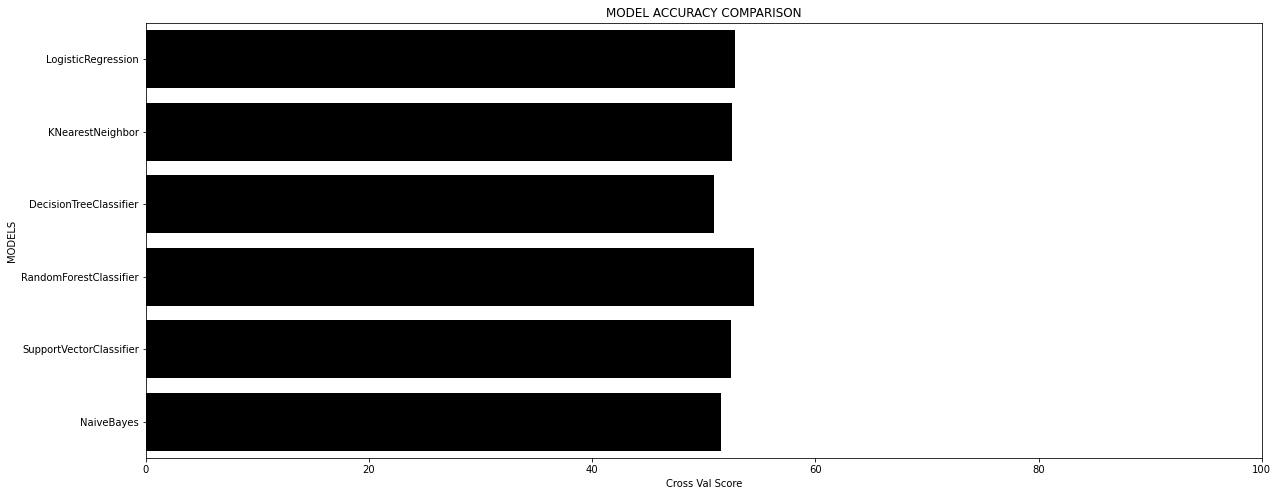

In [21]:
import seaborn as sns

r = pd.DataFrame(columns=["MODELS","R2CV"])
for i, model in enumerate(modelsc):
    name = d[i]
    R2CV = cross_val_score(model,validation_corpus,y_val,cv=2).mean()
    result = pd.DataFrame([[name,R2CV*100]],columns=["MODELS","R2CV"])
    r = r.append(result)

figure = plt.figure(figsize=(20,8))
sns.barplot(x="R2CV",y="MODELS",data=r,color="k")
plt.xlabel("Cross Val Score")
plt.ylabel("MODELS")
plt.xlim(0,100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

Here we see that none of our models perform particularly well, though we still have some models performing better than others.

#### Tuning the best models

Now we try to find the best possible combination of parameters to achieve the highest F-score.

In [22]:
scores = {}
accuracyscore = {}
recallscore = {}
precisionscore = {}
fscore = {}

Starting with the Random Forest Classifier

##### Random Forest Classifier

Initializing a simple RFC model (no parameters), that can be tweaked

In [23]:
RFC_noob = model_pipeline(RandomForestClassifier(random_state=42))

Testing all possible combinations of chosen parameters and finding the F-score (very time consuming)

In [24]:
parameters = {"clf__n_estimators": [100, 500, 1000, 2000],
             "clf__max_depth": [3, 6, 12, 24, 48],
             "clf__criterion": ["gini", "entropy"],
             }

In [25]:
gs_clf = GridSearchCV(RFC_noob, parameters, cv=2, n_jobs=-1).fit(train_corpus, y_train)

In [26]:
scores["RFC"] = gs_clf.best_score_

In [27]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__criterion: 'gini'
clf__max_depth: 12
clf__n_estimators: 100


In [28]:
RFC_tuned = Pipeline([('vect', CountVectorizer(tokenizer=lambda x: x, preprocessor= lambda x: x , token_pattern=None )
                     ), ('tfidf', TfidfTransformer()
                     ), ('clf', RandomForestClassifier(random_state=42, 
                                                       criterion = 'gini', 
                                                       max_depth= 12, 
                                                       n_estimators= 100))]).fit(train_corpus, y_train);

In [29]:
predict = RFC_tuned.predict(validation_corpus)
accuracyscore["RandomForestClassifier"]  = accuracy_score( y_val ,predict) 
recallscore["RandomForestCl*assifier"]    = recall_score(   y_val, predict)
precisionscore["RandomForestClassifier"] = precision_score(y_val, predict)
fscore["RandomForestClassifier"]         = f1_score(       y_val, predict)

##### Support vector

Initializing a simple Support Vector model (no parameters), that can be tweaked

In [30]:
SV_noob = model_pipeline(SVC(random_state=42))

Testing all possible combinations of chosen parameters and finding the F-score (very time consuming)

In [31]:
parameters = {"clf__C": [1,3,9,27],
              "clf__kernel": ["linear", "poly", "rbf", "sigmoid"],
              "clf__degree": [1,3,9,27],
             }

In [32]:
gs_clf = GridSearchCV(SV_noob, parameters, cv=2, n_jobs=-1).fit(train_corpus, y_train)

In [33]:
scores["SV"] = gs_clf.best_score_

In [34]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__C: 1
clf__degree: 1
clf__kernel: 'rbf'


In [35]:
SV_tuned = Pipeline([('vect', CountVectorizer(tokenizer=lambda x: x, preprocessor= lambda x: x, token_pattern=None )
                     ), ('tfidf', TfidfTransformer()
                     ), ('clf', SVC(random_state=42, 
                                    C = 1, 
                                    degree= 1,
                                    kernel="rbf"))]).fit(train_corpus, y_train);

In [36]:
predict = SV_tuned.predict(validation_corpus)
accuracyscore["SupportVector"]  = accuracy_score( y_val ,predict) 
recallscore["SupportVector"]    = recall_score(   y_val, predict)
precisionscore["SupportVector"] = precision_score(y_val, predict)
fscore["SupportVector"]         = f1_score(       y_val, predict)

##### Logistic Regression

In [37]:
LR_noob = model_pipeline(SGDClassifier(loss='log', random_state=42))

In [38]:
parameters = {"clf__alpha": [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03],
             "clf__penalty": ["l2", "l1", "elasticnet"],
             }

In [39]:
gs_clf = GridSearchCV(LR_noob, parameters, cv=2, n_jobs=-1).fit(train_corpus, y_train)

In [40]:
scores["LR"] = gs_clf.best_score_

In [41]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.0003
clf__penalty: 'l2'


In [42]:
LR_tuned = Pipeline([('vect', CountVectorizer(tokenizer=lambda x: x, preprocessor= lambda x: x, token_pattern=None )
                     ), ('tfidf', TfidfTransformer()
                     ), ('clf', SGDClassifier(loss="log", 
                                    alpha=0.0003, 
                                    penalty= "l2"))]).fit(train_corpus, y_train);

In [43]:
predict = LR_tuned.predict(validation_corpus)
accuracyscore["LogisticRegression"]  = accuracy_score( y_val ,predict) 
recallscore["LogisticRegression"]    = recall_score(   y_val, predict)
precisionscore["LogisticRegression"] = precision_score(y_val, predict)
fscore["LogisticRegression"]         = f1_score(       y_val, predict)

##### Final model on the basis of the validation data

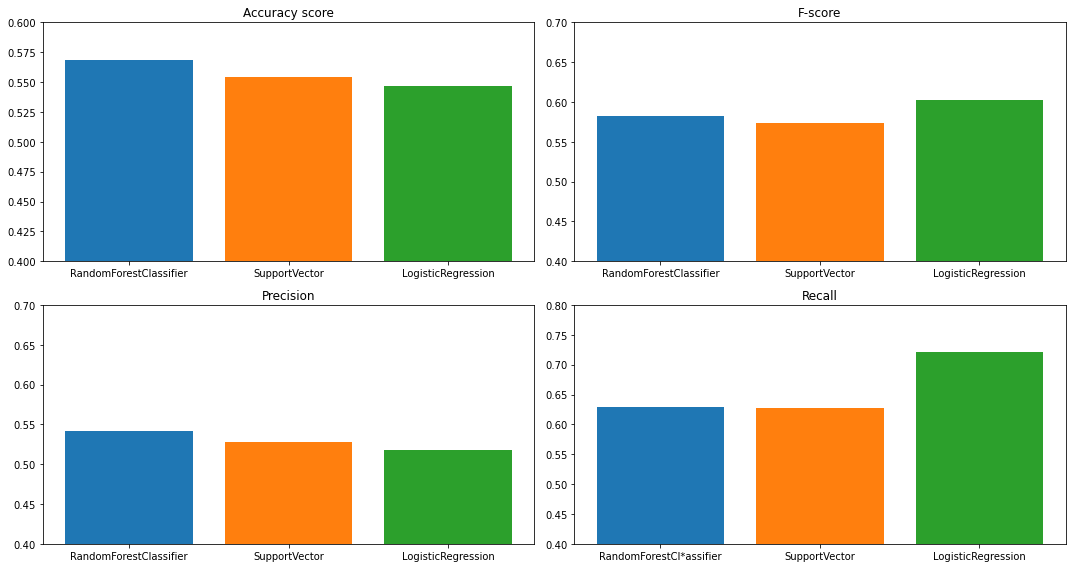

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
ax[0,0].set_title("Accuracy score")
ax[0,1].set_title("F-score")
ax[1,0].set_title("Precision")
ax[1,1].set_title("Recall")

for i in accuracyscore.items():
    ax[0,0].bar(i[0], i[1])
    ax[0,0].set_ylim([0.4,0.6])

for i in fscore.items():
    ax[0,1].bar(i[0], i[1])
    ax[0,1].set_ylim([0.4,0.7])
    
for i in precisionscore.items():
    ax[1,0].bar(i[0], i[1])
    ax[1,0].set_ylim([0.4,0.7])
    
for i in recallscore.items():
    ax[1,1].bar(i[0], i[1])
    ax[1,1].set_ylim([0.4,0.8])

plt.tight_layout()

We see that the models that we have tuned to have the highest accuracy score are all equally bad at classifying whether a given sentence is ironic.

It is logical that our model is really bad at classifying text-based irony, since the group members are also very poor at classifying irony, and thus we can not expect the model to outperform us massivel, since it lacks world knowledge and general experience and the emotional aspect of understanding the users intentions. Thus perhabs combining an intention model and an irony model could increase the performance of the irony model. 

Final model is RandomForestClassifier, since it has an higher accuracy score

##### Final model on test data metrics

In [45]:
model = RFC_tuned
predict = model.predict(test_corpus)
print("Logistic Regression" + ": ")
print("     - accuracy score:\t   {}"  .format(accuracy_score( y_test, predict)))
print("     - recall score: \t   {}"   .format(recall_score(   y_test, predict)))
print("     - precision score:\t   {}" .format(precision_score(y_test, predict)))
print("     - f1 score:\t   {}"        .format(f1_score(       y_test, predict)))
print()

Logistic Regression: 
     - accuracy score:	   0.5535714285714286
     - recall score: 	   0.6688102893890675
     - precision score:	   0.45714285714285713
     - f1 score:	   0.5430809399477806



## Multi-Classification on Stance Dataset

First Multi-classification, mapping all the different stances to a 3x5 map taking values from 0-14 and classifying on the basis of these 15 different labels.

### Creating the neccesery dataframes

In [46]:
hillary_train  = pd.concat([train_hillary,  train_hillary_labels ], axis=1)
abortion_train = pd.concat([train_abortion, train_abortion_labels], axis=1)
atheism_train  = pd.concat([train_atheism,  train_atheism_labels ], axis=1)
climate_train  = pd.concat([train_climate,  train_climate_labels ], axis=1)
feminist_train = pd.concat([train_feminist, train_feminist_labels], axis=1)

abortion_train["labels"] += 3
atheism_train["labels"]  += 6
climate_train["labels"]  += 9
feminist_train["labels"] += 12

In [47]:
hillary_val  = pd.concat([validation_hillary,  validation_hillary_labels ], axis=1)
abortion_val = pd.concat([validation_abortion, validation_abortion_labels], axis=1)
atheism_val  = pd.concat([validation_atheism,  validation_atheism_labels ], axis=1)
climate_val  = pd.concat([validation_climate,  validation_climate_labels ], axis=1)
feminist_val = pd.concat([validation_feminist, validation_feminist_labels], axis=1)

abortion_val["labels"] += 3
atheism_val["labels"]  += 6
climate_val["labels"]  += 9
feminist_val["labels"] += 12

In [48]:
hillary_test  = pd.concat([test_hillary,  test_hillary_labels ], axis=1)
abortion_test = pd.concat([test_abortion, test_abortion_labels], axis=1)
atheism_test  = pd.concat([test_atheism,  test_atheism_labels ], axis=1)
climate_test  = pd.concat([test_climate,  test_climate_labels ], axis=1)
feminist_test = pd.concat([test_feminist, test_feminist_labels], axis=1)

abortion_test["labels"] += 3
atheism_test["labels"]  += 6
climate_test["labels"]  += 9
feminist_test["labels"] += 12

In [49]:
mapping = {}
mapping[0]  = "none hillary"
mapping[1]  = "against hillary"
mapping[2]  = "favor hillary"
mapping[3]  = "none abortion"
mapping[4]  = "against abortion"
mapping[5]  = "favor abortion"
mapping[6]  = "none atheism"
mapping[7]  = "against atheism"
mapping[8]  = "favor atheism"
mapping[9]  = "none climate"
mapping[10] = "against climate"
mapping[11] = "favor climate"
mapping[12] = "none feminist"
mapping[13] = "against feminist"
mapping[14] = "favor feminist"

In [50]:
combined_train = pd.concat([hillary_train, abortion_train, atheism_train, climate_train, feminist_train],  ignore_index=True)
combined_val   = pd.concat([hillary_val,   abortion_val,   atheism_val,   climate_val,   feminist_val],    ignore_index=True)
combined_test  = pd.concat([hillary_test,  abortion_test,  atheism_test,  climate_test,  feminist_test],   ignore_index=True)

### Tokenizing our training and validation tweets

In [51]:
copy_train = combined_train
for idx, i in enumerate(copy_train["tweets"]):
    x = tokenize_meaning(i)
    combined_train.loc[idx, ["tweets"]] = x[0]

copy_val = combined_val
for idx, i in enumerate(copy_val["tweets"]):
    x = tokenize_meaning(i)
    combined_val.loc[idx, ["tweets"]] = x[0]

copy_test = combined_test
for idx, i in enumerate(copy_test["tweets"]):
    x = tokenize_meaning(i)
    combined_test.loc[idx, ["tweets"]] = x[0]
    

combined_val   = combined_val[combined_val['labels'].notna()]
combined_train = combined_train[combined_train["labels"].notna()]
combined_test  = combined_test[combined_test["labels"].notna()]

In [52]:
combined_train["labels"].value_counts()

1     354
4     319
13    295
7     273
11    191
14    189
0     160
3     159
9     151
12    113
5     109
2     106
6     105
8      83
10     13
Name: labels, dtype: int64

### Baseline model

In [53]:
LR_multi = model_pipeline(SGDClassifier(loss='log', random_state=42)).fit(combined_train["tweets"], combined_train["labels"]);

In [54]:
predicted = LR_multi.predict(combined_val["tweets"])
accuracy_score(predicted, combined_val["labels"])

0.25510204081632654

### Classification models different models

Training different classifying models without any special tuning to see which is the best in its simplest form.

In [55]:
KNN_multi = model_pipeline(KNeighborsClassifier()).fit(combined_train["tweets"], combined_train["labels"])
DTC_multi = model_pipeline(DecisionTreeClassifier(random_state=42)).fit(combined_train["tweets"], combined_train["labels"])
RFC_multi = model_pipeline(RandomForestClassifier(random_state=42)).fit(combined_train["tweets"], combined_train["labels"])
SV_multi  = model_pipeline(SVC(random_state=42)).fit(combined_train["tweets"], combined_train["labels"])
NB_multi  = model_pipeline(MultinomialNB()).fit(combined_train["tweets"],combined_train["labels"])

In [56]:
modelsc = [LR_multi, KNN_multi, DTC_multi, RFC_multi, SV_multi, NB_multi]
d = ["LogisticRegression",
     "KNearestNeighbor",
     "DecisionTreeClassifier",
     "RandomForestClassifier",
     "SupportVectorClassifier",
     "NaiveBayes"]

Here the precision score will be flawed since our models does not predict all labels in the dataset, i.e the NaiveBayes only predicts 5 out of the 15 different labels in our data, which makes calculating the precision score for these non-predicted labels not possible, since they have not been predicted. This is also the reason that warnings is being returned.

In [57]:
ls = list(range(0,15))
for idx, model in enumerate(modelsc):
    name = d[idx]
    predict = model.predict(combined_val["tweets"])
    uniq, counts = np.unique(predict, return_counts=True)
    print(str(name) + ": ")
    temp = [item for item in ls if item not in uniq]
    print("     - classes not predicted by model: \t {}".format(temp))
    print("     - accuracy score:\t   {}"  .format(accuracy_score( combined_val["labels"],predict)))
    print("     - recall score: \t   {}"   .format(recall_score(   combined_val["labels"], predict, average='macro')))
    print("     - precision score:\t   {}" .format(precision_score(combined_val["labels"], predict, average='macro')))
    print("     - f1 score:\t   {}"        .format(f1_score(       combined_val["labels"], predict, average='macro')))
    print()

LogisticRegression: 
     - classes not predicted by model: 	 [5, 6, 8, 10]
     - accuracy score:	   0.25510204081632654
     - recall score: 	   0.1701842959907476
     - precision score:	   0.21468038160547329
     - f1 score:	   0.1503871642522902

KNearestNeighbor: 
     - classes not predicted by model: 	 [10]
     - accuracy score:	   0.21428571428571427
     - recall score: 	   0.1561443335636884
     - precision score:	   0.15882094124199392
     - f1 score:	   0.1458966873055521

DecisionTreeClassifier: 
     - classes not predicted by model: 	 [10]
     - accuracy score:	   0.18027210884353742
     - recall score: 	   0.14286186439886628
     - precision score:	   0.13871558590856836
     - f1 score:	   0.13950600987034906

RandomForestClassifier: 
     - classes not predicted by model: 	 [6, 8, 10, 12]
     - accuracy score:	   0.23809523809523808
     - recall score: 	   0.15151192893128376
     - precision score:	   0.2267274327352735
     - f1 score:	   0.134505798506462

C:\Users\Ruben PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruben PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruben PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruben PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245

SupportVectorClassifier: 
     - classes not predicted by model: 	 [2, 3, 5, 6, 8, 9, 10, 12]
     - accuracy score:	   0.25170068027210885
     - recall score: 	   0.15099524131782197
     - precision score:	   0.11920988077704496
     - f1 score:	   0.11922443333332285

NaiveBayes: 
     - classes not predicted by model: 	 [2, 3, 5, 6, 8, 9, 10, 11, 12, 14]
     - accuracy score:	   0.1870748299319728
     - recall score: 	   0.10120685765847058
     - precision score:	   0.08603216684340757
     - f1 score:	   0.06777185697444318



C:\Users\Ruben PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruben PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In our validation data, we have a label that is only occuring twice in our data, which means that we can not perform cross-validation scores on it, because we simply do not have enough data to support any conclusions. This is also the reason that a lot of our classifiers is ignoring these classes with few members.

In [58]:
combined_val["labels"].value_counts()

1     39
4     36
13    33
7     31
11    21
14    21
0     18
3     18
9     17
12    13
2     12
5     12
6     12
8      9
10     2
Name: labels, dtype: int64

This cross validation is thus flawed since a lot of our models is ignoring a lot of the classes in our data, such as the NaiveBayes is ignoring more than half of the classes in the data, which makes it a very bad model for classifying stance, but in the cross validation it at first glance looks to have a very high score, which is very misleading

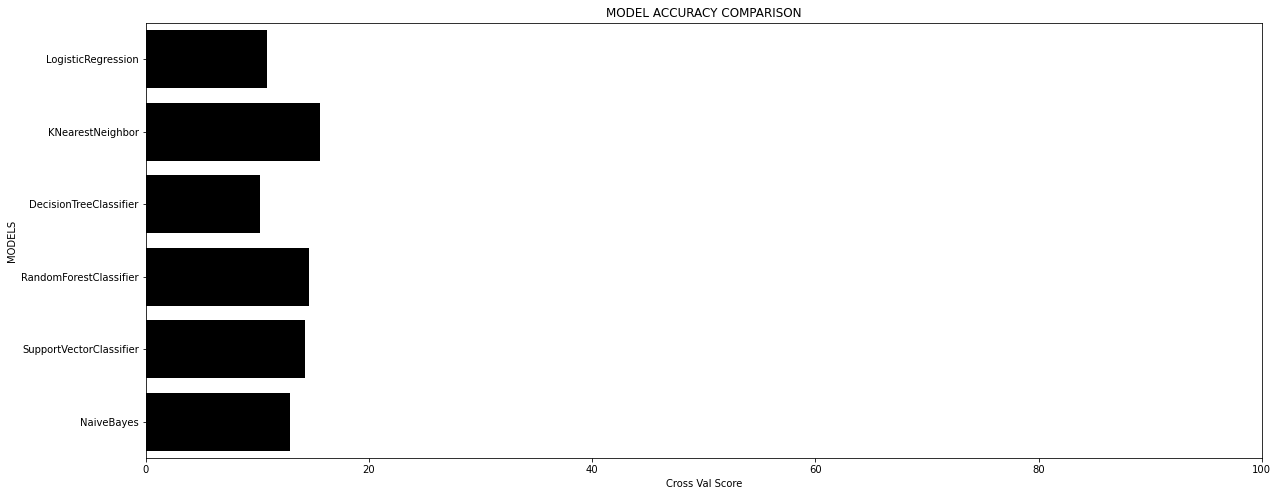

In [59]:
import seaborn as sns

r = pd.DataFrame(columns=["MODELS","R2CV"])
for i, model in enumerate(modelsc):
    name = d[i]
    R2CV = cross_val_score(model, combined_val["tweets"], combined_val["labels"], cv=2).mean()
    result = pd.DataFrame([[name,R2CV*100]], columns=["MODELS","R2CV"])
    r = r.append(result)

figure = plt.figure(figsize=(20, 8))
sns.barplot(x="R2CV", y="MODELS", data=r, color="k")
plt.xlabel("Cross Val Score")
plt.ylabel("MODELS")
plt.xlim(0, 100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

#### Tuning the best models

We then decide to try and optimize the models that actually predict most of the classes in our dataset. 

Now we try to find the best possible combination of parameters to achieve the highest F-score.

In [60]:
scores = {}
accuracyscore = {}
recallscore = {}
precisionscore = {}
fscore = {}

##### Logistical Regression

In [61]:
LR_noob_multi = model_pipeline(SGDClassifier(loss='log', random_state=42))

In [62]:
parameters = {"clf__alpha": [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03],
              "clf__penalty": ["l2", "l1", "elasticnet"],
             }

We try and optimize the macro averaged recall score since the data is unbalanced

In [63]:
gs_clf = GridSearchCV(LR_noob_multi, parameters, cv=2, n_jobs=-1, scoring="recall_macro").fit(combined_train["tweets"], combined_train["labels"]);

In [64]:
scores["LR"] = gs_clf.best_score_
scores["LR"]

0.1673263961829901

In [65]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.0001
clf__penalty: 'l1'


In [66]:
LR_tuned_multi = Pipeline([('vect', CountVectorizer(tokenizer=lambda x: x, preprocessor= lambda x: x, token_pattern=None )
                     ), ('tfidf', TfidfTransformer()
                     ), ('clf', SGDClassifier(loss="log", 
                                    alpha=0.0001, 
                                    penalty= "l1"))]).fit(combined_train["tweets"], combined_train["labels"]);

In [67]:
predict = LR_tuned_multi.predict(combined_val["tweets"])
ls = list(range(0,15))
uniq, counts = np.unique(predict, return_counts=True)
temp = [item for item in ls if item not in uniq]
print("     - classes not predicted by model: \t {}".format(temp))
accuracyscore["LogisticRegression"]  = accuracy_score( combined_val["labels"] , predict) 
recallscore["LogisticRegression"]    = recall_score(   combined_val["labels"],  predict, average="macro")
precisionscore["LogisticRegression"] = precision_score(combined_val["labels"],  predict, average="macro")
fscore["LogisticRegression"]         = f1_score(       combined_val["labels"],  predict, average="macro")

     - classes not predicted by model: 	 [2, 3, 5, 6, 9, 10]


C:\Users\Ruben PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Random Forest Classifier

In [68]:
RFC_noob_multi = model_pipeline(RandomForestClassifier(random_state=42))

In [69]:
parameters = {"clf__n_estimators": [100, 500, 1000, 2000],
             "clf__max_depth": [3, 6, 12, 24, 48],
             "clf__criterion": ["gini", "entropy"],
             }

In [70]:
gs_clf = GridSearchCV(RFC_noob_multi, parameters, cv=2, n_jobs=-1, scoring="recall_macro").fit(combined_train["tweets"], combined_train["labels"]);

In [71]:
scores["RFC"] = gs_clf.best_score_

In [72]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__criterion: 'gini'
clf__max_depth: 48
clf__n_estimators: 500


In [73]:
RFC_tuned_multi = Pipeline([('vect', CountVectorizer(tokenizer=lambda x: x, preprocessor= lambda x: x, token_pattern=None)
                         ), ('tfidf', TfidfTransformer()
                         ), ('clf', RandomForestClassifier(random_state=42, 
                                                       criterion = 'gini', 
                                                       max_depth= 48, 
                                                       n_estimators= 500))]).fit(combined_train["tweets"], combined_train["labels"]);

In [74]:
predict = RFC_tuned_multi.predict(combined_val["tweets"])
ls = list(range(0,15))
uniq, counts = np.unique(predict, return_counts=True)
temp = [item for item in ls if item not in uniq]
print("classes not predicted by model: {}".format(temp))
accuracyscore["RandomForestClassifier"]  = accuracy_score( combined_val["labels"] , predict) 
recallscore["RandomForestClassifier"]    = recall_score(   combined_val["labels"],  predict, average="macro")
precisionscore["RandomForestClassifier"] = precision_score(combined_val["labels"],  predict, average="macro")
fscore["RandomForestClassifier"]         = f1_score(       combined_val["labels"],  predict, average="macro")

classes not predicted by model: [6, 8, 10, 12]


C:\Users\Ruben PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### KNearestNeighbor

In [75]:
KNN_noob_multi = model_pipeline(KNeighborsClassifier())

In [76]:
parameters = {"clf__n_neighbors": [1,3,9,27,60,120],
             "clf__weights": ["uniform", "distance"],
             "clf__algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
             }

In [77]:
gs_clf = GridSearchCV(KNN_noob_multi, parameters, cv=2, n_jobs=-1, scoring="recall_macro").fit(combined_train["tweets"], combined_train["labels"]);

In [78]:
scores["KNN"] = gs_clf.best_score_

In [79]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__algorithm: 'auto'
clf__n_neighbors: 9
clf__weights: 'distance'


In [80]:
KNN_tuned_multi = Pipeline([('vect', CountVectorizer(tokenizer=lambda x: x, preprocessor= lambda x: x, token_pattern=None)
                         ), ('tfidf', TfidfTransformer()
                         ), ('clf', KNeighborsClassifier(algorithm= 'auto', 
                                                         n_neighbors=9,
                                                         weights="distance"))]).fit(combined_train["tweets"],combined_train["labels"])

In [81]:
predict = KNN_tuned_multi.predict(combined_val["tweets"])
ls = list(range(0,15))
uniq, counts = np.unique(predict, return_counts=True)
temp = [item for item in ls if item not in uniq]
print("classes not predicted by model: {}".format(temp))
accuracyscore["KNN"]  = accuracy_score( combined_val["labels"] , predict) 
recallscore["KNN"]    = recall_score(   combined_val["labels"],  predict, average="macro")
precisionscore["KNN"] = precision_score(combined_val["labels"],  predict, average="macro")
fscore["KNN"]         = f1_score(       combined_val["labels"],  predict, average="macro")

classes not predicted by model: [10]


C:\Users\Ruben PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Final model

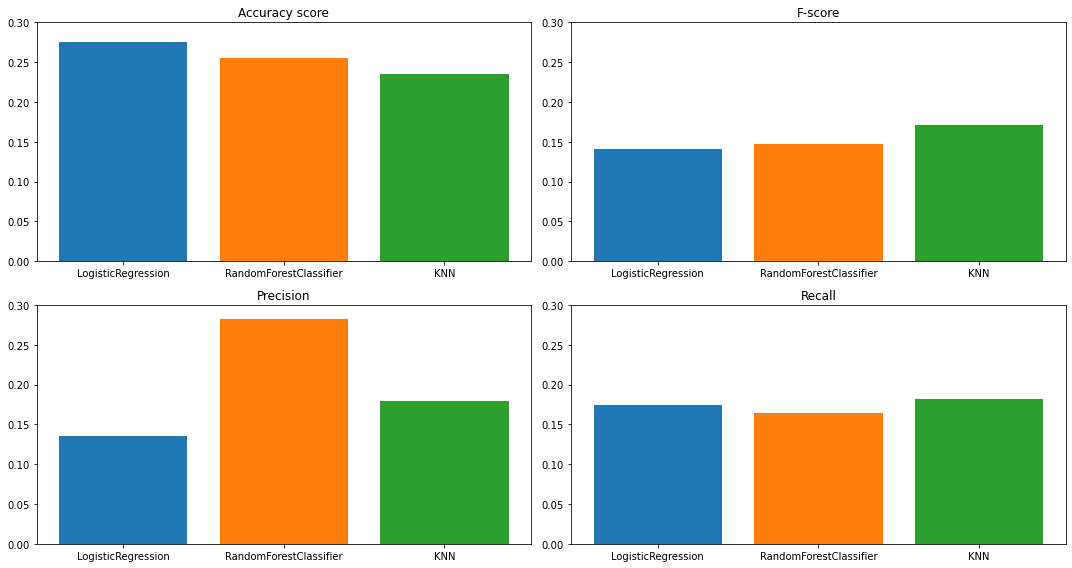

In [82]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
ax[0,0].set_title("Accuracy score")
ax[0,1].set_title("F-score")
ax[1,0].set_title("Precision")
ax[1,1].set_title("Recall")

for i in accuracyscore.items():
    ax[0,0].bar(i[0], i[1])
    ax[0,0].set_ylim([0,0.3])

for i in fscore.items():
    ax[0,1].bar(i[0], i[1])
    ax[0,1].set_ylim([0,0.3])
    
for i in precisionscore.items():
    ax[1,0].bar(i[0], i[1])
    ax[1,0].set_ylim([0,0.3])
    
for i in recallscore.items():
    ax[1,1].bar(i[0], i[1])
    ax[1,1].set_ylim([0,0.3])

plt.tight_layout()

Here we see that the logistical regression is the best model for our multiclass 3x5 stance mapping. This is surprisingly high, given the difficulty of the task with this many different classes. Also if one were to randomly guess (uniformly) what the class was, the probability of getting one correct would be around $\frac{1}{15}$ which our models are a lot better than, so our models even though they are very bad are actually better than random.

Final model: Random Forest Classifier, since its metrics is the best and it actually predicts most of the classes in the data, whereas the others do not.

##### Final model on test data metrics

In [83]:
model = KNN_tuned_multi
predict = model.predict(combined_test["tweets"])
print("RandomForestClassifier" + ": ")
uniq, counts = np.unique(predict, return_counts=True)
temp = [item for item in ls if item not in uniq]
print("     - classes not predicted by model: \t {}".format(temp))
print("     - accuracy score:\t   {}"  .format(accuracy_score( combined_test["labels"], predict)))
print("     - recall score: \t   {}"   .format(recall_score(   combined_test["labels"], predict,  average="macro")))
print("     - precision score:\t   {}" .format(precision_score(combined_test["labels"], predict,  average="macro")))
print("     - f1 score:\t   {}"        .format(f1_score(       combined_test["labels"], predict,  average="macro")))
print()

RandomForestClassifier: 
     - classes not predicted by model: 	 []
     - accuracy score:	   0.21857485988791034
     - recall score: 	   0.1293985722138177
     - precision score:	   0.1290124308772997
     - f1 score:	   0.12514616152456073



#### Checking what subjects test data it performs well on

By only predicting one of the validation datasets using the multiclass 3x5 mapping, we can test what classes it performs well and poorly on.

Here we can not look at the precision and the recall scores, since it will take into account all of the different classes that we are not trying to predict

In [84]:
ls = [hillary_test, abortion_test, atheism_test, climate_test, feminist_test]
d = ["hillary", "abortion", "atheism", "climate", "feminist"]
for idx, data in enumerate(ls):
    name = d[idx]
    predicted = model.predict(data["tweets"])
    print(str(name) + ": ")
    print("     - accuracy score:\t   {}"  .format(accuracy_score(data["labels"],predicted)))
    print()

hillary: 
     - accuracy score:	   0.2135593220338983

abortion: 
     - accuracy score:	   0.2

atheism: 
     - accuracy score:	   0.22272727272727272

climate: 
     - accuracy score:	   0.09467455621301775

feminist: 
     - accuracy score:	   0.22807017543859648



Here we see that the model varies a lot on the different subject stances.

## Multi-classification on a single stance subject (Atheism)

### Necessary Datasets

In [85]:
atheism_train = pd.concat([train_atheism, train_atheism_labels], axis=1)
atheism_val   = pd.concat([validation_atheism, validation_atheism_labels], axis=1)
atheism_test  = pd.concat([test_atheism,  test_atheism_labels],  axis=1)

### Tokenizing our training and validation tweets

In [86]:
copy_train = atheism_train
for idx, i in enumerate(copy_train["tweets"]):
    x = tokenize_meaning(i)
    atheism_train.loc[idx, ["tweets"]] = x[0]

copy_val = atheism_val
for idx, i in enumerate(copy_val["tweets"]):
    x = tokenize_meaning(i)
    atheism_val.loc[idx, ["tweets"]] = x[0]

copy_test = atheism_test
for idx, i in enumerate(copy_test["tweets"]):
    x = tokenize_meaning(i)
    atheism_test.loc[idx, ["tweets"]] = x[0]

### Baseline model

In [87]:
LR_single = model_pipeline(SGDClassifier(loss='log', random_state=42)).fit(atheism_train["tweets"], atheism_train["labels"]);

In [88]:
predicted = LR_single.predict(atheism_val["tweets"])
accuracy_score(predicted, atheism_val["labels"])

0.7115384615384616

### Classification models different models

Training different classifying models without any special tuning to see which is the best in its simplest form.

In [89]:
KNN_single = model_pipeline(KNeighborsClassifier()).fit(atheism_train["tweets"], atheism_train["labels"])
DTC_single = model_pipeline(DecisionTreeClassifier(random_state=42)).fit(atheism_train["tweets"], atheism_train["labels"])
RFC_single = model_pipeline(RandomForestClassifier(random_state=42)).fit(atheism_train["tweets"], atheism_train["labels"])
SV_single  = model_pipeline(SVC(random_state=42)).fit(atheism_train["tweets"], atheism_train["labels"])
NB_single  = model_pipeline(MultinomialNB()).fit(atheism_train["tweets"],atheism_train["labels"])

In [90]:
modelsc = [LR_single, KNN_single, DTC_single, RFC_single, SV_single, NB_single]
d = ["LogisticRegression",
     "KNearestNeighbor",
     "DecisionTreeClassifier",
     "RandomForestClassifier",
     "SupportVectorClassifier",
     "NaiveBayes"]

In [91]:
ls = list(range(0,3))
for idx, model in enumerate(modelsc):
    name = d[idx]
    predict = model.predict(atheism_val["tweets"])
    print(str(name) + ": ")
    uniq, counts = np.unique(predict, return_counts=True)
    temp = [item for item in ls if item not in uniq]
    print("     - classes not predicted by model: \t {}".format(temp))
    print("     - accuracy score:\t   {}"  .format(accuracy_score(atheism_val["labels"],predict)))
    print("     - recall score: \t   {}"   .format(recall_score(atheism_val["labels"], predict,   average='macro')))
    print("     - precision score:\t   {}" .format(precision_score(atheism_val["labels"], predict, average='macro')))
    print("     - f1 score:\t   {}"        .format(f1_score(atheism_val["labels"], predict, average='macro')))
    print()

LogisticRegression: 
     - classes not predicted by model: 	 []
     - accuracy score:	   0.7115384615384616
     - recall score: 	   0.5803464755077659
     - precision score:	   0.6797619047619047
     - f1 score:	   0.5982808616404308

KNearestNeighbor: 
     - classes not predicted by model: 	 []
     - accuracy score:	   0.5576923076923077
     - recall score: 	   0.39844683393070485
     - precision score:	   0.4137426900584795
     - f1 score:	   0.3940513403429004

DecisionTreeClassifier: 
     - classes not predicted by model: 	 []
     - accuracy score:	   0.5769230769230769
     - recall score: 	   0.4695340501792114
     - precision score:	   0.4804713804713805
     - f1 score:	   0.4718306182121972

RandomForestClassifier: 
     - classes not predicted by model: 	 [2]
     - accuracy score:	   0.5961538461538461
     - recall score: 	   0.3503584229390681
     - precision score:	   0.3666666666666667
     - f1 score:	   0.2945326278659612

SupportVectorClassifier: 
     -

C:\Users\Ruben PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruben PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruben PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


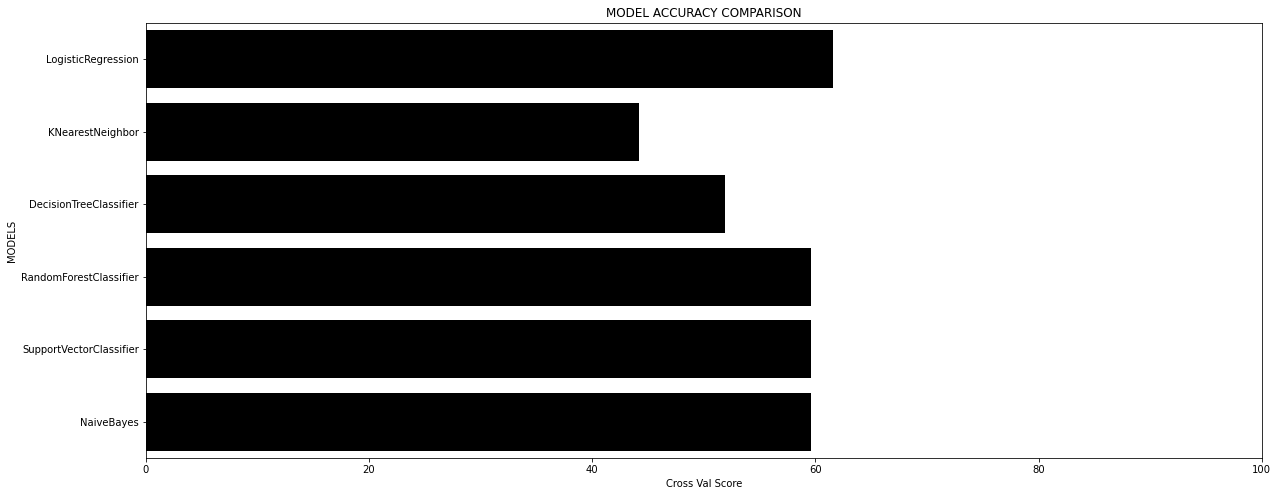

In [92]:
import seaborn as sns
r = pd.DataFrame(columns=["MODELS","R2CV"])
for i, model in enumerate(modelsc):
    name = d[i]
    R2CV = cross_val_score(model, atheism_val["tweets"], atheism_val["labels"], cv=2).mean()
    result = pd.DataFrame([[name,R2CV*100]], columns=["MODELS","R2CV"])
    r = r.append(result)

figure = plt.figure(figsize=(20, 8))
sns.barplot(x="R2CV", y="MODELS", data=r, color="k")
plt.xlabel("Cross Val Score")
plt.ylabel("MODELS")
plt.xlim(0, 100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

#### Tuning the best models

In [93]:
scores={}
accuracyscore = {}
recallscore = {}
precisionscore = {}
fscore = {}

##### Random Forest Classifier

In [94]:
RFC_noob_atheism = model_pipeline(RandomForestClassifier(random_state=42))

In [95]:
parameters = {"clf__n_estimators": [100, 500, 1000, 2000],
             "clf__max_depth": [3, 6, 12, 24, 48],
             "clf__criterion": ["gini", "entropy"],
             }

Since the data is imbalanced we try and optimize the macro averaged recall score

In [96]:
gs_clf = GridSearchCV(RFC_noob_atheism, parameters, cv=2, n_jobs=-1, scoring="recall_macro").fit(atheism_train["tweets"], atheism_train["labels"])

In [97]:
scores["RFC"] = gs_clf.best_score_
scores["RFC"]

0.3664877103694121

In [98]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__criterion: 'entropy'
clf__max_depth: 24
clf__n_estimators: 100


In [99]:
RFC_tuned_atheism = Pipeline([('vect', CountVectorizer(tokenizer=lambda x: x, preprocessor= lambda x: x )
                         ), ('tfidf', TfidfTransformer()
                         ), ('clf', RandomForestClassifier(random_state=42, 
                                                       criterion = 'entropy', 
                                                       max_depth= 24, 
                                                       n_estimators= 100))]).fit(atheism_train["tweets"], atheism_train["labels"])

In [100]:
predict = RFC_tuned_atheism.predict(atheism_val["tweets"])
accuracyscore["RandomForestClassifier"]  = accuracy_score( atheism_val["labels"] , predict) 
recallscore["RandomForestClassifier"]    = recall_score(   atheism_val["labels"],  predict, average="macro")
precisionscore["RandomForestClassifier"] = precision_score(atheism_val["labels"],  predict, average="macro")
fscore["RandomForestClassifier"]         = f1_score(       atheism_val["labels"],  predict, average="macro")

C:\Users\Ruben PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Support Vector Classifier

In [101]:
SV_noob_atheism = model_pipeline(SVC(random_state=42))

In [102]:
parameters = {"clf__C": [1,3,9,27],
             "clf__kernel": ["linear", "poly", "rbf", "sigmoid"],
             "clf__degree": [1,3,9,27],
             }

In [103]:
gs_clf = GridSearchCV(SV_noob_atheism, parameters, cv=2, n_jobs=-1, scoring="recall_macro").fit(atheism_train["tweets"], atheism_train["labels"])

In [104]:
scores["SV"] = gs_clf.best_score_
scores["SV"]

0.44863010841093465

In [105]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__C: 27
clf__degree: 3
clf__kernel: 'poly'


In [106]:
SV_tuned_atheism = Pipeline([('vect', CountVectorizer(tokenizer=lambda x: x, preprocessor= lambda x: x, token_pattern=None )
                     ), ('tfidf', TfidfTransformer()
                     ), ('clf', SVC(random_state=42, 
                                    C = 27, 
                                    degree= 3,
                                    kernel="poly"))]).fit(atheism_train["tweets"], atheism_train["labels"])

In [107]:
predict = SV_tuned_atheism.predict(atheism_val["tweets"])
accuracyscore["SupportVector"]  = accuracy_score( atheism_val["labels"] , predict) 
recallscore["SupportVector"]    = recall_score(   atheism_val["labels"],  predict, average="macro")
precisionscore["SupportVector"] = precision_score(atheism_val["labels"],  predict, average="macro")
fscore["SupportVector"]         = f1_score(       atheism_val["labels"],  predict, average="macro")

##### Logistic Regression Classifier

In [108]:
LR_noob_atheism = model_pipeline(SGDClassifier(loss='log', random_state=42))

In [109]:
parameters = {"clf__alpha": [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03],
              "clf__penalty": ["l2", "l1", "elasticnet"],
             }

Since we have an imbalanced dataset, we use macro averaged recall

In [110]:
atheism_train["labels"].value_counts()

1    273
0    105
2     83
Name: labels, dtype: int64

In [111]:
gs_clf = GridSearchCV(LR_noob_atheism, parameters, cv=2, n_jobs=-1, scoring="recall_macro").fit(atheism_train["tweets"], atheism_train["labels"])

In [112]:
scores["LR"] = gs_clf.best_score_
scores["LR"]

0.3948566745888605

In [113]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.0003
clf__penalty: 'l1'


In [114]:
LR_tuned_atheism = Pipeline([('vect', CountVectorizer(tokenizer=lambda x: x, preprocessor= lambda x: x, token_pattern=None )
                     ), ('tfidf', TfidfTransformer()
                     ), ('clf', SGDClassifier(random_state=42, 
                                    alpha = 0.0003, 
                                    penalty="l1"
                                             ))]).fit(atheism_train["tweets"], atheism_train["labels"])

In [115]:
predict = LR_tuned_atheism.predict(atheism_val["tweets"])
accuracyscore["LogisticRegression"]  = accuracy_score( atheism_val["labels"] , predict) 
recallscore["LogisticRegression"]    = recall_score(   atheism_val["labels"],  predict, average="macro")
precisionscore["LogisticRegression"] = precision_score(atheism_val["labels"],  predict, average="macro")
fscore["LogisticRegression"]         = f1_score(       atheism_val["labels"],  predict, average="macro")

C:\Users\Ruben PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


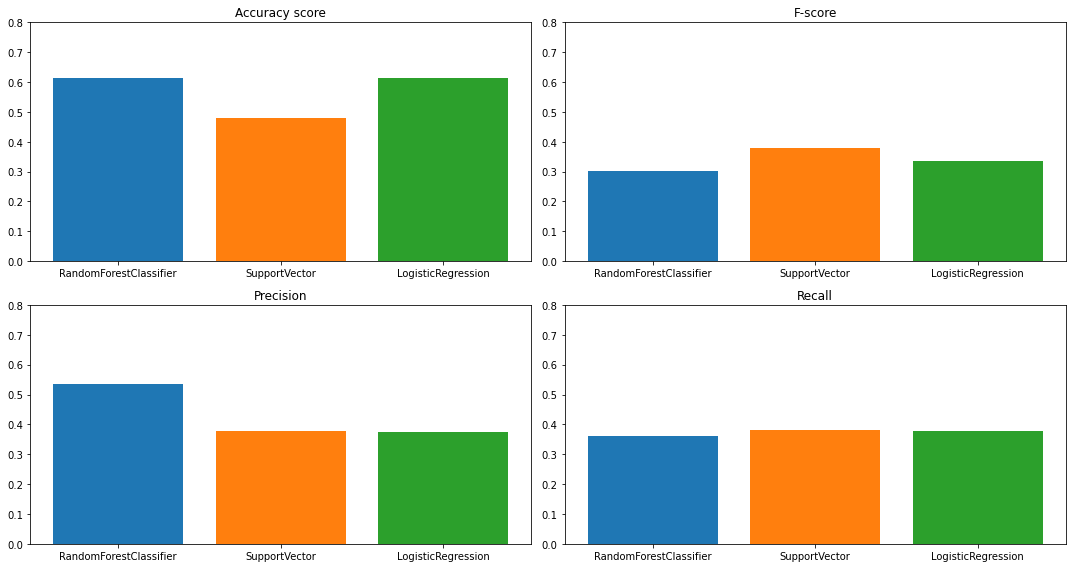

In [116]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
ax[0,0].set_title("Accuracy score")
ax[0,1].set_title("F-score")
ax[1,0].set_title("Precision")
ax[1,1].set_title("Recall")

for i in accuracyscore.items():
    ax[0,0].bar(i[0], i[1])
    ax[0,0].set_ylim([0,0.8])

for i in fscore.items():
    ax[0,1].bar(i[0], i[1])
    ax[0,1].set_ylim([0,0.8])
    
for i in precisionscore.items():
    ax[1,0].bar(i[0], i[1])
    ax[1,0].set_ylim([0,0.8])
    
for i in recallscore.items():
    ax[1,1].bar(i[0], i[1])
    ax[1,1].set_ylim([0,0.8])

plt.tight_layout()

##### Final model on test data metrics

In [117]:
ls = [0,1,2]
model = LR_tuned_atheism
predict = model.predict(atheism_test["tweets"])
print("Logistic Regression" + ": ")
uniq, counts = np.unique(predict, return_counts=True)
temp = [item for item in ls if item not in set(uniq)]
print("     - classes not predicted by model: \t {}".format(temp))
print("     - accuracy score:\t   {}"  .format(accuracy_score( atheism_test["labels"], predict)))
print("     - recall score: \t   {}"   .format(recall_score(   atheism_test["labels"], predict,  average="macro")))
print("     - precision score:\t   {}" .format(precision_score(atheism_test["labels"], predict,  average="macro")))
print("     - f1 score:\t   {}"        .format(f1_score(       atheism_test["labels"], predict,  average="macro")))
print()

Logistic Regression: 
     - classes not predicted by model: 	 []
     - accuracy score:	   0.6909090909090909
     - recall score: 	   0.325
     - precision score:	   0.4098228663446055
     - f1 score:	   0.29390393759683714



## Evaluating our tokenizers on the final ML atheism model

In [118]:
scores={}
accuracyscore = {}
recallscore = {}
precisionscore = {}
fscore = {}

### Ideal tokenizer

In [119]:
def tokenize_ideal(line):
    """
    Takes a string as an input, this is a line or a tweet from our database. Splits the relevant words or characters into
    separate tokens.
    Returns either the tokens as a whitespace delimited string or as a list of the tokens. Also returns the non tokens as a list
    
    Keeps words, ?, !, ..., +, - and turns & into "and"
    removes dots, commas, # and %
    """
    tokens = []
    unmatchables = []
    
    for word in line.split():
        if re.findall(r"\w+-\w+|\w+'\w+|\w+|[&?!…]+", word) != []:
            x = re.findall(r"\w+-\w+|\w+'\w+|\w+|[&?!…]+", word)
            for element in x:
                if element == "âž" or element == "ðŸ":
                    continue
                elif element == "&":
                    tokens.append("and")
                else:
                    tokens.append(element.lower())

        if re.findall(r"\w+-\w+|\w+'\w+|\w+|[&?!…]", word) != [word] and re.findall(r"[^\w|&!?…]+", word) != []:
            unmatchables.append(re.findall(r"[^\w|!?…&]+", word)[0])

    s = " ".join(tokens)
    return (s, unmatchables, tokens)

In [120]:
ideal_train = pd.concat([train_atheism, train_atheism_labels], axis=1)
ideal_val   = pd.concat([validation_atheism, validation_atheism_labels], axis=1)
ideal_test  = pd.concat([test_atheism,  test_atheism_labels],  axis=1)

In [121]:
copy_train = ideal_train
for idx, i in enumerate(copy_train["tweets"]):
    x = tokenize_ideal(i)
    ideal_train.loc[idx, ["tweets"]] = x[0]

copy_val = ideal_val
for idx, i in enumerate(copy_val["tweets"]):
    x = tokenize_ideal(i)
    ideal_val.loc[idx, ["tweets"]] = x[0]

copy_test = ideal_test
for idx, i in enumerate(copy_test["tweets"]):
    x = tokenize_ideal(i)
    ideal_test.loc[idx, ["tweets"]] = x[0]

In [122]:
predict = LR_tuned_atheism.predict(ideal_val["tweets"])
accuracyscore["ideal_tokenizer"]  = accuracy_score( ideal_val["labels"] , predict) 
recallscore["ideal_tokenizer"]    = recall_score(   ideal_val["labels"],  predict, average="macro")
precisionscore["ideal_tokenizer"] = precision_score(ideal_val["labels"],  predict, average="macro")
fscore["ideal_tokenizer"]         = f1_score(       ideal_val["labels"],  predict, average="macro")

C:\Users\Ruben PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### tokenize ekstra

In [123]:
def tokenize_ekstra(line):
    """
    Works same way as tokenize_ideal
    
    Keeps words, dots, ?, %, !, #, ..., +, - and turns & into "and"
    Removes emojies and commas
    """
    tokens = []
    unmatchables = []
    
    for word in line.split():
        if re.findall(r"\w+-\w+|\w+'\w+|\w+|[.&?%!#…]+", word) != []:
            x = re.findall(r"\w+-\w+|\w+'\w+|\w+|[.&?%!#…]+", word)
            for element in x:
                if element == "âž" or element == "ðŸ":
                    continue
                elif element == "&":
                    tokens.append("and")
                else:
                    tokens.append(element.lower())

        if re.findall(r"\w+-\w+|\w+'\w+|\w+|[.&?%!#…]", word) != [word] and re.findall(r"[^\w|.&!?%#…]+", word) != []:
            unmatchables.append(re.findall(r"[^\w|.!#?%…&]+", word)[0])

    s = " ".join(tokens)
    return (s, unmatchables, tokens)

In [124]:
ekstra_train = pd.concat([train_atheism, train_atheism_labels], axis=1)
ekstra_val   = pd.concat([validation_atheism, validation_atheism_labels], axis=1)
ekstra_test  = pd.concat([test_atheism,  test_atheism_labels],  axis=1)

In [125]:
copy_train = ekstra_train
for idx, i in enumerate(copy_train["tweets"]):
    x = tokenize_ekstra(i)
    ekstra_train.loc[idx, ["tweets"]] = x[0]

copy_val = ekstra_val
for idx, i in enumerate(copy_val["tweets"]):
    x = tokenize_ekstra(i)
    ekstra_val.loc[idx, ["tweets"]] = x[0]

copy_test = ekstra_test
for idx, i in enumerate(copy_test["tweets"]):
    x = tokenize_ekstra(i)
    ekstra_test.loc[idx, ["tweets"]] = x[0]

In [126]:
predict = LR_tuned_atheism.predict(ekstra_val["tweets"])
accuracyscore["ekstra_tokenizer"]  = accuracy_score( ekstra_val["labels"] , predict) 
recallscore["ekstra_tokenizer"]    = recall_score(   ekstra_val["labels"],  predict, average="macro")
precisionscore["ekstra_tokenizer"] = precision_score(ekstra_val["labels"],  predict, average="macro")
fscore["ekstra_tokenizer"]         = f1_score(       ekstra_val["labels"],  predict, average="macro")

C:\Users\Ruben PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### NLTK tokenizer

In [127]:
def gold_tokenizer(line):
    tok = nltk.tokenize.TreebankWordTokenizer()
    new = ""
    for t in tok.tokenize(line):
        new = new + " " +t
    return new

In [128]:
gold_train = pd.concat([train_atheism, train_atheism_labels], axis=1)
gold_val   = pd.concat([validation_atheism, validation_atheism_labels], axis=1)
gold_test  = pd.concat([test_atheism,  test_atheism_labels],  axis=1)

In [129]:
copy_train = gold_train
for idx, i in enumerate(copy_train["tweets"]):
    x = gold_tokenizer(i)
    gold_train.loc[idx, ["tweets"]] = x

copy_val = gold_val
for idx, i in enumerate(copy_val["tweets"]):
    x = gold_tokenizer(i)
    gold_val.loc[idx, ["tweets"]] = x

copy_test = gold_test
for idx, i in enumerate(copy_test["tweets"]):
    x = gold_tokenizer(i)
    gold_test.loc[idx, ["tweets"]] = x


In [130]:
predict = LR_tuned_atheism.predict(gold_val["tweets"])
accuracyscore["nltk_tokenizer"]  = accuracy_score( gold_val["labels"] , predict) 
recallscore["nltk_tokenizer"]    = recall_score(   gold_val["labels"],  predict, average="macro")
precisionscore["nltk_tokenizer"] = precision_score(gold_val["labels"],  predict, average="macro")
fscore["nltk_tokenizer"]         = f1_score(       gold_val["labels"],  predict, average="macro")

C:\Users\Ruben PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### no tokenizer

In [131]:
raw_train = pd.concat([train_atheism, train_atheism_labels], axis=1)
raw_val   = pd.concat([validation_atheism, validation_atheism_labels], axis=1)
raw_test  = pd.concat([test_atheism,  test_atheism_labels],  axis=1)

In [132]:
predict = LR_tuned_atheism.predict(raw_val["tweets"])
accuracyscore["raw"]  = accuracy_score( raw_val["labels"] , predict) 
recallscore["raw"]    = recall_score(   raw_val["labels"],  predict, average="macro")
precisionscore["raw"] = precision_score(raw_val["labels"],  predict, average="macro")
fscore["raw"]         = f1_score(       raw_val["labels"],  predict, average="macro")

C:\Users\Ruben PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
ideal_val["tweets"].iloc[39]

'necessity is the mother of innovation our deen is complete there is no need for innovation islam semst'

In [134]:
ekstra_val["tweets"].iloc[39]

'# necessity is the mother of # innovation . our # deen is complete there is no need for innovation . # islam # semst'

In [135]:
gold_val["tweets"].iloc[39]

' # Necessity is the mother of # innovation. Our # Deen is complete - there is no need for innovation. # islam # SemST'

In [136]:
raw_val["tweets"].iloc[39]

'#Necessity is the mother of #innovation. Our #Deen is complete - there is no need for innovation. #islam #SemST '

### Evaluation of tokenizers 

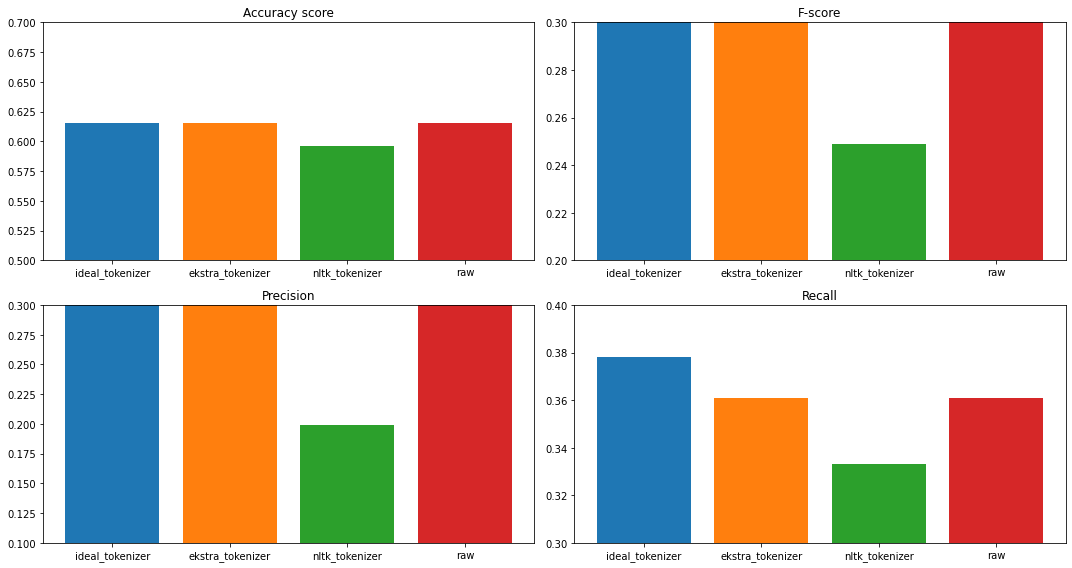

In [137]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
ax[0,0].set_title("Accuracy score")
ax[0,1].set_title("F-score")
ax[1,0].set_title("Precision")
ax[1,1].set_title("Recall")

for i in accuracyscore.items():
    ax[0,0].bar(i[0], i[1])
    ax[0,0].set_ylim([0.5,0.7])

for i in fscore.items():
    ax[0,1].bar(i[0], i[1])
    ax[0,1].set_ylim([0.2,0.3])
    
for i in precisionscore.items():
    ax[1,0].bar(i[0], i[1])
    ax[1,0].set_ylim([0.1,0.3])
    
for i in recallscore.items():
    ax[1,1].bar(i[0], i[1])
    ax[1,1].set_ylim([0.3,0.4])

plt.tight_layout()

Here we see that the tokenizers wee have identified to be the best and most appropriate for this project perform equally bad. But, they perform better than using no tokenizer. If we were to the tokenizer implemented in CountVectorizer we would see an increase in our metrics, thus if we were to do this project for real and the demand of using our own tokenizer did not exists, then we could achieve higher accuracies. 

# 5. Conclusion